<a href="https://colab.research.google.com/github/Jyoti-S-Shukla/Machine-learning-models/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Regression**

**Regression is generally used for curve fitting task. Here we will demonstrate regression task for the following :**

1. Fitting of a Line (One Variable and Two Variables)
2. Fitting of a Plane
3. Fitting of M-dimensional hyperplane
4. Practical Example of Regression task

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Fitting of a Line (One Variable)

**Generation of line data ($y=w_{1}x+w_{0}$)**

1. Generate $x$, 1000 points from 0-1
2. Take $w_{0}=10$ and $w_{1}=1$ and generate y
3. Plot ($x$,$y$)

<function matplotlib.pyplot.show>

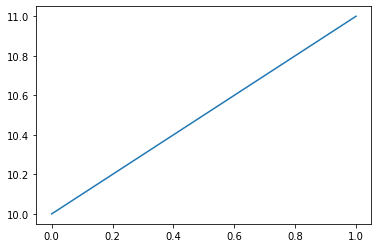

In [ ]:
## Write your code here
x = np.random.randint(0,1,1000)
w0 = 10
w1 = 1
x = np.linspace(0,1,1000)
y = (w1*x + w0)
plt.plot(x,y)
plt.show


**Corruption of data using uniformly sampled random noise**

1. Generate random numbers uniformly from (0-1) with same size as $y$
2. Corrupt $y$ and generate $y_{cor}$ by adding the generated random samples with a weight of 0.1.
3. Plot ($x$,$y_{cor}$) (use scatter plot)

(1000,)


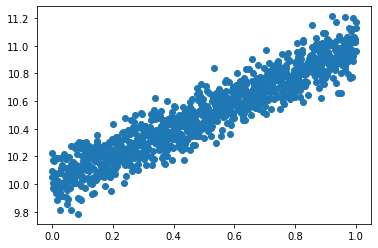

In [ ]:
## Write your code here
#x = 1 * np.random.random(1000)
x = np.linspace(0,1,1000)
# y = a*x + b with noise
y_corr = w1 * x + w0 + 0.1* np.random.normal(0,1,size=x.shape)
print(y.shape)
plt.scatter(x,y_corr,marker='o')


**Heuristically predicting the curve (Generating the Error Curve)**

1. Keep $w_{0}=10$ as constant and find $w_{1}$
2. Create a search space from -5 to 7 for $w_{1}$, by generating 1000 numbers between that
3. Find $y_{pred}$ using each value of $w_{1}$
4. The $y_{pred}$ that provide least norm error with y, will be decided as best $y_{pred}$
$$error=\frac{1}{m}\sum_{i=1}^{M}(y_{i}-y_{pred_{i}})^2$$
5. Plot error vs search_$w1$
6. First plot the scatter plot ($x$,$y_{cor}$) , over that plot ($x$,$y_{bestpred}$)

Optimal value of w1 is 0.675999999999795


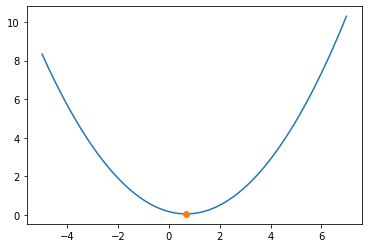

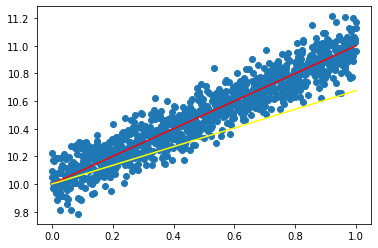

In [ ]:
w0=10
w1_ran = np.arange(-5,7,12/1000)
y_pred =[]
for i in w1_ran:
  y_p= i*x + w0
  y_pred.append(y_p)
def mse(true, pred):
    """
    true: array of true values    
    pred: array of predicted values
    
    returns: mean square error loss
    """
    
    return np.sum((true - pred)**2)*(1/len(y))

error = [mse(y[i], y_pred[i]) for i in range(len(y_pred))]
min_error = min(error)
index = error.index(min_error)
best_w1 = w1_ran[index]
print("Optimal value of w1 is",best_w1)
plt.plot(w1_ran,error)
plt.plot(best_w1,min(error),marker='o')
plt.show()
plt.scatter(x,y_corr)
x = np.linspace(0,1,1000)
y_pred = best_w1*x+w0
plt.plot(x,y, color ='red')
plt.plot(x,y_pred, color ='yellow')
plt.show()

**Using Gradient Descent to predict the curve**

1. $Error=\frac{1}{m}\sum_{i=1}^{M}(y_{i}-y_{pred_{i}})^2=\frac{1}{m}\sum_{i=1}^{M}(y_{i}-(w_{0}+w_{1}x_{i}))^2$

2. $\nabla Error|_{w1}=\frac{-2}{M}\sum_{i=1}^{M}(y_{i}-y_{pred_{i}}) \times x_{i}$

3. $w_{1}|_{new}=w_{1}|_{old}-\lambda \nabla Error|_{w1}=w_{1}|_{old}+ \frac{2\lambda}{M}\sum_{i=1}^{M}(y_{i}-y_{pred_{i}}) \times x_{i}$

0.9999999999999991 10


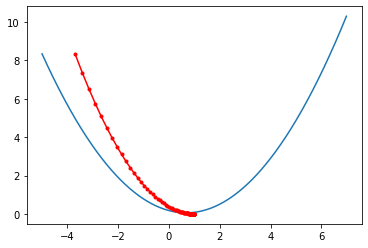

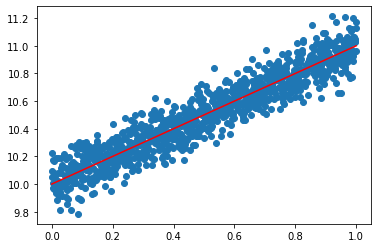

In [ ]:
L = 0.09 # The learning Rate
epochs = 1000  # The number of iterations to perform gradient descent
c = 10
X=x
Y=y
m=-4
n = (len(X)) # Number of elements in X
err=0
#y_diff =-10
m_updt=[]
temp0 = np.zeros((1000))
temp1 = np.zeros((1000))
# Performing Gradient Descent 
for i in range(epochs): 
    #y_diff = Y_pred
    Y_pred = m*X + c  # The current predicted value of Y
    #print(Y_pred)
    err = (1/n)*np.sum((Y - Y_pred)**2)
    #error_grad.append(err)
    D_m = (-2/n) * sum(X * (Y - Y_pred))  # Derivative wrt m
    D_c = (-2/n) * sum(Y - Y_pred)  # Derivative wrt c
    m = m - L * D_m  # Update m
    temp0[i]=m
    temp1[i]=err
    #y_diff = y_diff - Y_pred
    m_updt.append(err)
    if m <7.1:
      continue
    else:
      break
    #c = c - L * D_c  # Update c
    
print (m, c)
# Making predictions
#Y_pred = m*X + c
plt.plot(w1_ran,error)
plt.plot(temp0,temp1,'.-', color ='red')
#plt.plot(m_updt,Y_pred,'.-')
plt.show()
plt.scatter(X, y_corr, marker= 'o') 
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red')  # regression line
plt.show()

#Fitting of a Line (Two Variables)

**Generation of Line Data ($y=w_{1}x+w_{0}$)**

1. Generate $x$, 1000 points from 0-1
2. Take $w_{0}=5$ and $w_{1}=1.5$ and generate $y$
3. Plot ($x$,$y$)

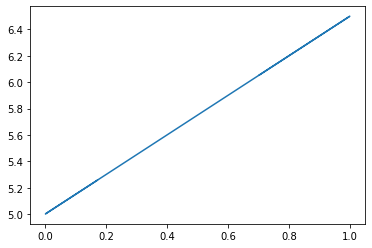

In [ ]:
## Write your code here
x = np.random.uniform(0,1,1000)
w0=5
w1=1.5
y = w1*x+ w0
plt.plot(x,y)

**Corrupt the data using uniformly sampled random noise**

1. Generate random numbers uniformly from (0-1) with same size as $y$
2. Corrupt $y$ and generate $y_{cor}$ by adding the generated random samples with a weight of 0.1
3. Plot ($x$,$y_{cor}$) (use scatter plot)

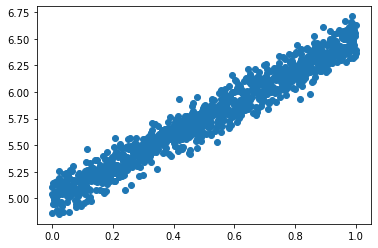

In [ ]:
## Write your code here
x = np.linspace(0,1,1000)
y_cor = w1*x+w0 + 0.1*np.random.normal(0,1,size=1000)
plt.scatter(x,y_cor, marker='o')

**Plot the Error Surface**

1. we have all the data points available in $y_{cor}$, now we have to fit a line with it. (i.e from $y_{cor}$ we have to predict the true value of $w_{1}$ and $w_{0}$)
2. Take $w_{1}$ and $w_{0}$ from -10 to 10, to get the error surface

Estimated coefficients:
b_0 = 4.995083298649066            
b_1 = 1.5026311292512948


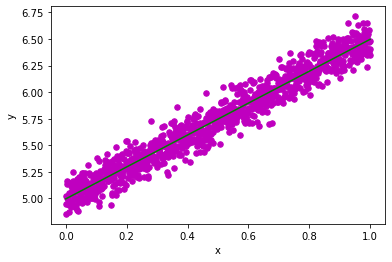

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
 
def estimate_coef(x, y):
    # number of observations/points
    n = np.size(x)
 
    # mean of x and y vector
    m_x = np.mean(x)
    m_y = np.mean(y)
 
    # calculating cross-deviation and deviation about x
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x
 
    # calculating regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x
 
    return (b_0, b_1)
 
def plot_regression_line(x, y, b):
    # plotting the actual points as scatter plot
    plt.scatter(x, y, color = "m",
               marker = "o", s = 30)
 
    # predicted response vector
    y_pred = b[0] + b[1]*x
 
    # plotting the regression line
    plt.plot(x, y_pred, color = "g")
 
    # putting labels
    plt.xlabel('x')
    plt.ylabel('y')
 
    # function to show plot
    plt.show()
 
def main():
    # observations / data
    x = np.linspace(0,1,1000)
    y = y_cor
 
    # estimating coefficients
    b = estimate_coef(x, y)
    print("Estimated coefficients:\nb_0 = {}  \
          \nb_1 = {}".format(b[0], b[1]))
 
    # plotting regression line
    plot_regression_line(x, y, b)
 
if __name__ == "__main__":
    main()


**Gradient Descent to find optimal Values**

1.5043713301151438 4.9976256625351505


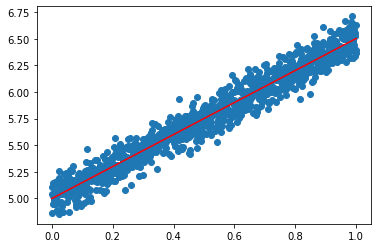

In [ ]:
X= x
Y= y_cor
# Building the model
m = -5
c = -8

L = 0.09  # The learning Rate
epochs = 1000  # The number of iterations to perform gradient descent
temp0 = np.zeros((1000,1))
temp1 = np.zeros((1000,1))
n = float(len(X)) # Number of elements in X
w1_updt =[]
w0_updt =[]
error = []
err =0
# Performing Gradient Descent 
for i in range(epochs): 
    Y_pred = m*X + c  # The current predicted value of Y
    err = (1/n)*sum((Y-Y_pred)**2)
    D_m = (-2/n) * sum(X * (Y - Y_pred))  # Derivative wrt m
    D_c = (-2/n) * sum(Y - Y_pred)  # Derivative wrt c
    temp0[i,0] = m
    temp1[i,0] = c 
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c
    w1_updt.append(m)
    w0_updt.append(c)
    error.append(err)
    
print (m, c)
# Making predictions
Y_pred = m*X + c

plt.scatter(X, Y) 
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red')  # regression line
plt.show()
#plt.contour(x,y,w1_updt,w0_updt)

[ 1.5043713301151438 ] [ 4.9976256625351505 ]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: The following kwargs were not used by contour: 'label'
  app.launch_new_instance()


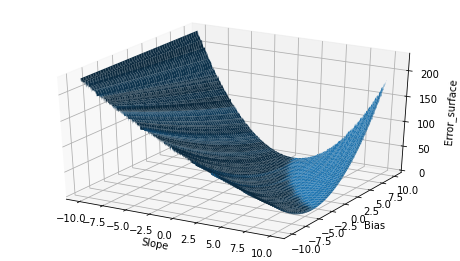

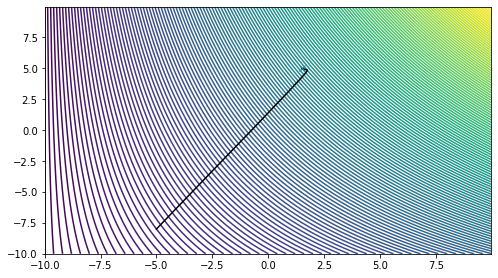

In [ ]:
slope = np.arange(-10,10,1/50)  
bias = np.arange(-10,10,1/50)  
w0,w1 = np.meshgrid(slope, bias)  
ypred = w1*X + w0
loss = np.power((y_cor-ypred),2)  
fig = plt.figure(figsize=(8,10)) 
ax = fig.add_subplot(211, projection='3d') 
ax = fig.gca(projection='3d')  
surf = ax.plot_surface(w0,w1,loss,  label="Loss surface", edgecolor='none')  

ax.set_xlabel('Slope')  
ax.set_ylabel('Bias')  
ax.set_zlabel('Error_surface')
fig = plt.figure(figsize=(8,10))
ax = fig.add_subplot(212)
ax.contour(w0,w1,ypred,180,label='contour_plot')
#print(loss)
#plt.plot(w1,error,'.-',color='red')
print('[',m,']' ,'[', c,']',)
plt.plot(temp0, temp1, 'black')
plt.plot(m, c, marker='x')

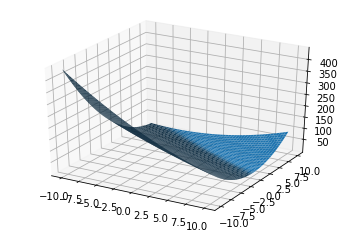

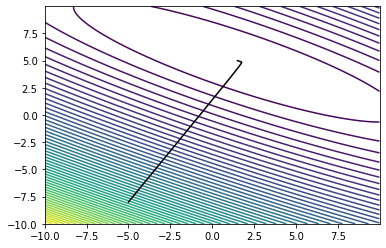

In [ ]:
#w0 = 1
w0 = np.arange(-10,10,1/50)
w1 = np.arange(-10,10,1/50)
pred = []
err=0
n = 1000
error = []
for i in w0:
  e1=[]
  for j in w1:
    y_p = i + j*X
    pred.append(y_p)
    err = (1/n)*np.sum((y_cor-y_p)**2)
    e1.append(err)
  error.append(e1)
error = np.array(error)
w0, w1 = np.meshgrid(w0, w1)
ax = plt.axes(projection='3d')                                                     # 3-D plot
ax.plot_surface(w0,w1,error)
plt.show()
plt.contour(w0,w1,error,70) 
plt.plot(temp0,temp1,'black')                                                     # Contour Plot
plt.show()

#Fitting of a Plane

**Generation of plane data**

1. Generate $x_{1}$ and $x_{2}$ from range -1 to 1, (30 samples)
2. Equation of plane $y=w_{0}+w_{1}x_{1}+w_{2}x_{2}$
3. Here we will fix $w_{0}$ and will learn $w_{1}$ and $w_{2}$

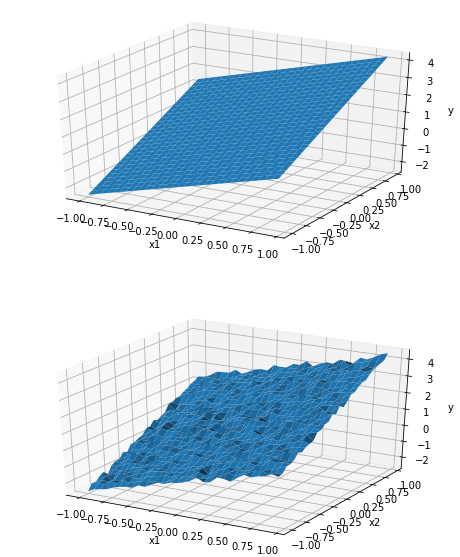

In [ ]:
## Write your code here
w0 = 1
w1 = 1.5
w2 = 2
#y = w0 + w1*x1+ w2*x2
x1 = np.arange(-1,1,2/30)
x2= np.arange(-1,1,2/30)
X1, X2 = np.meshgrid(x1,x2) 
Y = w0 + w1*X1+ w2*X2
fig = plt.figure(figsize=(8,10)) 
ax = fig.add_subplot(211, projection='3d') 
ax.set_xlabel('x1')  
ax.set_ylabel('x2')  
ax.set_zlabel('y')
ax.plot_surface(X1,X2,Y)
ax = fig.add_subplot(212, projection='3d') 
Y_corr = w0 + w1*X1+ w2*X2 + np.random.normal(0,0.1,(30,30))
ax.set_xlabel('x1')  
ax.set_ylabel('x2')  
ax.set_zlabel('y')
ax.plot_surface(X1,X2,Y_corr)

**Generate the Error Surface**

1. Vary $w_{1}$ and $w_{2}$ and generate the error surface and find their optimal value 
2. Also plot the Contour

In [ ]:
print(x1.shape)

(30,)


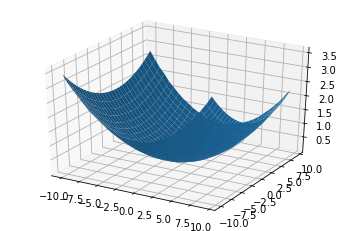

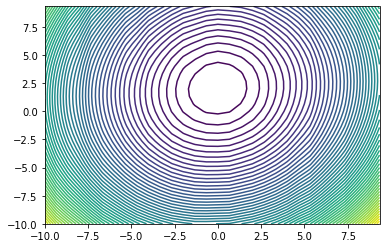

In [ ]:
## Write your code here
w0 = 1
w1 = np.arange(-10,10,2/3)
w2 = np.arange(-10,10,2/3)
pred = []
err=0
error = []
for i in w1:
  e1=[]
  for j in w2:
    y_p = w0 + i*X1 + j*X2
    pred.append(y_p)
    err = (1/900)*sum((Y_corr-y_p)**2)
    e1.append(err)
  error.append(e1)
error = np.array(e1)
w1, w2 = np.meshgrid(w1, w2)
ax = plt.axes(projection='3d')                                                     # 3-D plot
ax.plot_surface(w1,w2, error)
plt.show()
plt.contour(w1,w2,error,70)                                                      # Contour Plot
plt.show()

**Prediction using Gradient Descent**

1.499129385967372 2.002070368431645


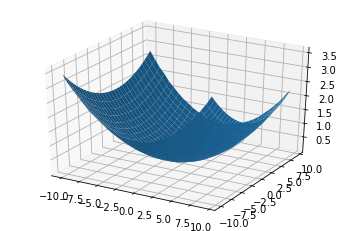

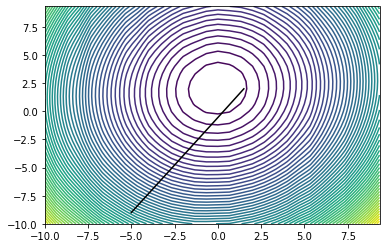

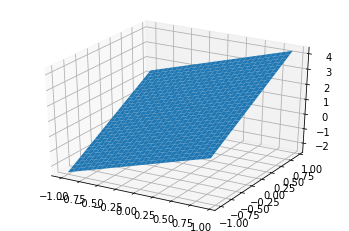

In [ ]:
#X= x
Y= Y_corr
# Building the model
w_1 = -5
w_2 = -9
w_0= 5
L = 0.01  # The learning Rate
epochs = 1000  # The number of iterations to perform gradient descent
n = float(len(X1)) # Number of elements in X
w1_updt =[]
w2_updt =[]
loss = []
e1 =1
e2 =0
# Performing Gradient Descent 

if abs(e1-e2)> 0.000001:
  for i in range(epochs): 
    Y_pred = w0 +w_1*X1 + w_2*X2  # The current predicted value of Y
    w1_updt.append(w_1)
    w2_updt.append(w_2)
    e1 = (1/n)*sum((Y-Y_pred)**2)
    D_w1 = (-2/n) * np.sum(X1 * (Y - Y_pred))  # Derivative wrt m
    D_w2 = (-2/n) * np.sum(X2*(Y - Y_pred))  # Derivative wrt c
    #temp0[i,0] = w_1
    #temp1[i,0] = w_2 
    w_1 = w_1 - L * D_w1  # Update m
    w_2 = w_2 - L * D_w2  # Update c 
    Y_pred = w0 +w_1*X1 + w_2*X2
    e2 =  (1/n)*sum((Y-Y_pred)**2)
    loss.append(e1)
    
print (w_1, w_2)
# Making predictions
#Y_pred = w0 +w1*x1 + w2*x2
loss = np.array(loss)
w1 = np.arange(-10,10,2/3)
w2 = np.arange(-10,10,2/3)
w1, w2 = np.meshgrid(w1, w2)
ax = plt.axes(projection='3d')                                                     # 3-D plot
ax.plot_surface(w1,w2, error)
plt.show()
plt.contour(w1,w2,error,70)                                                      # Contour Plot
plt.plot(w1_updt,w2_updt,'black')
plt.show()
ax = plt.axes(projection='3d')
Y_pred = w0 +w_1*X1 + w_2*X2
ax.plot_surface(X1,X2, Y_pred)
plt.show()
#plt.contour(x,y,w1_updt,w0_updt)
#print(temp0)

#Fitting of M-dimentional hyperplane (M-dimention, both in matrix inversion and gradient descent)


Here we will vectorize the input and will use matrix method to solve the regression problem.

let we have M- dimensional hyperplane we have to fit using regression, the inputs are $x1, x2, x3,...,x_M$. in vector form we can write $[x1,x2,...,x_M]^{T}$, and similarly the weights are $w1, w2, ...w_M$ can be written as a vector $[w1,w2,...w_M]^{T}$ , Then the equation of the plane can be written as:
$$y=w1x1+w2x2+...+w_Mx_M$$

$w1, w2,....,wM$ are the scalling parameters in M different direction, and we also need a offset parameter w0, to capture the offset variation while fitting.

The final input vector (generally known as augmented feature vector) is represented as $[1,x1,x2,...,x_{M}]^{T}$ and the weight matrix is $[w0,w1,w2,...w_M]^{T}$, now the equation of the plane can be written as:
$$y=w0+w1x1+w2x2+...+w_Mx_M$$ 

In matrix notation: $y=x^{T} w$ (for a single data point), but in general we are dealing with N- data points, so in matrix notation
$$Y=X^{T}W$$
where Y is a $N \times 1$ vector, X is a $M \times N$ matrix and W is a $M \times 1$ vector. 

$$Error=\frac{1}{N}||Y-X^{T}W||^{2}$$

it looks like a optimization problem, where we have to find W,  which will give minimum error.

1. **By computation:**

$\nabla Error=0$ will give us $W_{opt}$, then $W_{opt}$ can be written as:

$$W_{opt}=(XX^{T})^{-1}XY$$

2. **By gradient descent:**

$$W_{new}=W_{old}+\frac{2\lambda}{N}X(Y-X^{T}W_{old})$$

1. Create a class named Regression
2. Inside the class, include constructor, and the following functions:

    a. grad_update: Takes input as previous weight, learning rate, x, y and returns the updated weight.

    b. error: Takes input as weight, learning rate, x, y and returns the mean squared error.
    
    c. mat_inv: This returns the pseudo inverse of train data which is multiplied by labels.

    d. Regression_grad_des: Here, inside the for loop, write a code to update the weights. Also calulate error after each update of weights and store them in a list. Next, calculate the deviation in error with new_weights and old_weights and break the loop, if it's below a threshold value mentioned the code.

(5, 1000)
(6, 1)
(6, 1000)
(1000, 1)
[[1.05042742]
 [1.99955769]
 [8.00069665]
 [3.99971736]
 [6.00080346]
 [5.00047019]]
[[1.04915356]
 [1.9868162 ]
 [7.96808124]
 [3.99169093]
 [5.97835943]
 [4.97897004]]


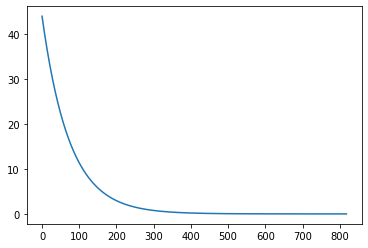

In [ ]:
class regression:
  # Constructor
  def __init__(self, name='reg'):
    self.name = name  # Create an instance variable
  def grad_update(self,w_old,lr,y,x):
    #write code here
    Derivative = (-2/y.shape[0]) * (x @ (y - (np.matmul(x.T,w_old))))
    w = w_old - lr*Derivative
    return w

  def error(self,w,y,x):
    loss = np.square(y - (np.matmul(x.T,w)))
    cost = np.sum(loss)/y.shape[0]
    return cost
    

  def mat_inv(self,y,x_aug):
    mat_inv =np.matmul((np.linalg.pinv(np.matmul(x_aug,x_aug.T))),
                       (np.matmul(x_aug,y)))
     # write code here
    
    return mat_inv

  # By Gradien descent
  
  def Regression_grad_des(self,x,y,lr):
    tolerance = 0.00001
    w_old = np.random.rand(x.shape[0],1)
    diff_1 = 1
    diff_2 = 0
    error_grad = []
    for i in range(1000):
      # write code here
      while (diff_1 - diff_2)> tolerance:
        diff_1 = self.error(w_old,y,x)
        w_old = self.grad_update(w_old,lr,y,x)
        diff_2 = self.error(w_old,y,x)
        error_grad.append(diff_1)
      w_new= w_old

    return w_new,error_grad


#############################################################################
# Generation of data

sim_dim=5
sim_no_data=1000
x=np.random.uniform(-1,1,(sim_dim,sim_no_data))
print(x.shape)

w = np.array([[1],[2],[8],[4],[6],[5]]) #Write your code here (Initialise the weight matrix) (W=[w0,w1,.....,wM]')
print(w.shape)

## Augment the Input
x_aug = np.concatenate((np.ones((1,x.shape[1])), x),axis=0)## Write your code here (Augment the data so as to include x0 also which is a vector of ones)
print(x_aug.shape)

y=x_aug.T @ w  # vector multiplication
print(y.shape)

## Corrupt the input by adding noise 
noise=np.random.uniform(0,1,y.shape)
y=y+0.1*noise

### The data (x_aug and y) is generated ###

#############################################################################

# By Computation (Normal Equation)
reg = regression()
w_opt=reg.mat_inv(y,x_aug)
print(w_opt)

# By Gradien descent
lr=0.01
w_pred,error_grad=reg.Regression_grad_des(x_aug,y,lr)
print(w_pred)

plt.plot(error_grad)


#Practical Example (Salary Prediction)

1. Read data from csv file
2. Do train test split (90% and 10%)
3. Compute optimal weight values and predict the salary using the regression class created above (Use both the methods)
4. Find the mean square error in test.
5. Also find the optimal weight values using regression class from the Sci-kit learn library

In [ ]:
## Write your code here
import numpy as np
import matplotlib.pyplot as plt
# Define Regressor class
class Regressor():
    # init methodd initializes all parameters needed to implement regression
    def __init__(self, learning_rate=0.01, tol=0.01, seed=None,normalize=False):
        self.W = None
        self.b = None
        self.__lr = learning_rate
        self.__tol = tol
        self.__length = None
        self.__normalize = normalize
        self.__m = None
        self.__costs = []
        self.__iterations = []
        np.random.seed(seed if seed is not None else np.random.randint(100))
    # random initialization of weights and bias
    def __initialize_weights_and_bias(self):
        self.W = np.random.randn(self.__length) #(n,1)
        self.b = 0
    # compute the error function: sum of squared errors 
    def __computeCost(self,h,Y):
        loss = np.square(h-Y)
        cost = np.sum(loss)/(2*self.__m)
        return cost
    # implement optimization function
    def __optimize(self,X,Y):
        h = np.dot(X,self.W)+self.b
        dW = np.dot( X.T, (h-Y) ) / self.__m
        db = np.sum( h-Y )  / self.__m
        self.W = self.W - self.__lr*dW
        self.b = self.b - self.__lr*db
    # normalize the dataset by subtracting the mean and dividing by std deviation
    def __normalizeX(self,X):return (X-self.__mean) / (self.__std)
    # fit the model to the dataset: training process
    def fit(self, X, y, verbose=False):
        if self.__normalize:
            self.__mean, self.__std = X.mean(axis=0), X.std(axis=0)
            X = self.__normalizeX(X)
        self.__m,self.__length = X.shape
        self.__initialize_weights_and_bias()
        last_cost,i = float('inf'),0
        while True:
            h = np.dot(X,self.W)+self.b
            cost = self.__computeCost(h,y)
            if verbose: print(f"Iteration: {i}, Cost: {cost:.3f}")
            self.__optimize(X,y)
            if last_cost-cost < self.__tol: break
            else: last_cost,i = cost,i+1
            self.__costs.append(cost)
            self.__iterations.append(i)
    # test the model on test data
    def predict(self,X):

        if self.__normalize: X = self.__normalizeX(X)
        return np.dot(X,self.W)+self.b
    # plot the iterations vs cost curves
    def plot(self,figsize=(7,5)):
        plt.figure(figsize=figsize)
        plt.plot(self.__iterations,self.__costs)
        plt.xlabel('Iterations')
        plt.ylabel('Cost')
        plt.title("Iterations vs Cost")
        plt.show()
    # calculates the accuracy
    def score(self,X,y):
        return 1-(np.sum(((y-self.predict(X))**2))/np.sum((y-np.mean(y))**2))



X_train:(900, 5)
y_train:(900,)
[66272.91691839 64566.56100429 64500.77316845]
749    66274
824    64568
816    64502
Name: Salary, dtype: int64
Train Score: 0.999999994188142
Test Score:  0.9999999944815535


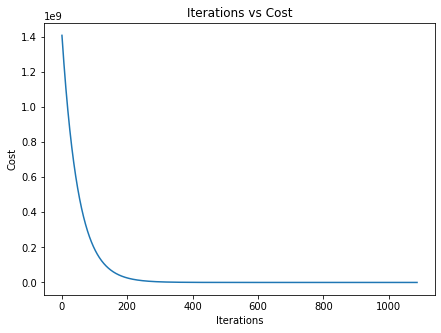

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

dataframe = pd.read_csv("/content/salary_pred_data.csv")
#print(dataframe)
X = dataframe.iloc[:,:-1]
y = dataframe.iloc[:,-1]
#print(X)
#print(y)
#data = load_boston()
# split the dataset into train and test sets
X_train, X_test, y_train,y_test = train_test_split(X, y,test_size=0.1)
# print train and test set shapes
print(f"X_train:{X_train.shape}\ny_train:{y_train.shape}")
# normalize the dataset and instantiate Regressor object
regressor = Regressor(normalize=True)
# call the fit method
regressor.fit(X_train,y_train)
predict = regressor.predict(X_test)
print(predict[0:3])
print(y_test[0:3])
train_score = regressor.score(X_train,y_train)
test_score = regressor.score(X_test,y_test)

print("Train Score:", train_score)
print("Test Score: ",test_score)
regressor.plot()

In [ ]:
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print(y_pred[0:3])
print(y_test[0:3])
Mse = mean_squared_error(y_test, y_pred)
print('slop', regressor.coef_)
print("Intercept", regressor.intercept_)
print("MSE", Mse)
#plt.plot(Mse)

[66274. 64568. 64502.]
749    66274
824    64568
816    64502
Name: Salary, dtype: int64
slop [2.e+03 1.e+02 2.e+00 3.e+02 5.e+03]
Intercept 20000.0
MSE 2.7131524091739305e-23
